## **Packages installation**

In [ ]:
!pip install cloudpickle
!pip install folium==0.2.1

In [ ]:
!python -m pip install "dask[complete]"

In [ ]:
!pip install --upgrade intake-esm

In [ ]:
!pip install s3fs

In [14]:
!pip install --upgrade requests>=2.24.0

In [10]:
!pip install --upgrade xarray>=0.16.2
# !pip install --upgrade s3fs

## **Data Loading from AWS server**

In [1]:
# Display output of plots directly in Notebook
import intake
import numpy as np
import pandas as pd
import xarray as xr

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
catalog_url = 'https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json'
col = intake.open_esm_datastore(catalog_url)

## **Columns for our experiment**
- component = 'atm'
- frequency = 'daily'
- experiment = 'HIST' or '20C'
- variable = 'TS' and 'Z500'

In [3]:
import pprint

uniques = col.unique(columns=["component", "frequency", "experiment", "variable"])
pprint.pprint(uniques, compact=True, indent=4)

{   'component': {   'count': 5,
                     'values': ['ocn', 'ice_sh', 'ice_nh', 'lnd', 'atm']},
    'experiment': {'count': 4, 'values': ['CTRL', '20C', 'HIST', 'RCP85']},
    'frequency': {   'count': 6,
                     'values': [   'hourly6-1990-2005', 'daily',
                                   'hourly6-2026-2035', 'monthly', 'static',
                                   'hourly6-2071-2080']},
    'variable': {   'count': 77,
                    'values': [   'FLNSC', 'WTT', 'WSPDSRFAV', 'hi', 'FW',
                                  'VNS', 'FSNO', 'aice', 'UET', 'FSNSC', 'SALT',
                                  'TREFMXAV_U', 'U', 'aice_d', 'Z500', 'SHFLX',
                                  'SHF_QSW', 'SSH', 'SHF', 'VBOT', 'SST',
                                  'SFWF', 'LHFLX', 'Q', 'PRECSC', 'UES', 'DIC',
                                  'QREFHT', 'O2', 'QSW_HBL', 'TEMP', 'TREFHT',
                                  'RAIN', 'PRECL', 'FSNS', 'PRECC',
             

In [4]:
col_subset_ts = col.search(frequency="daily", component="atm", variable="TS",
                        experiment="20C")

col_subset_z500 = col.search(frequency="daily", component="atm", variable="Z500",
                        experiment="20C")

In [5]:
col_subset_ts.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,TS,surface temperature (radiative),atm,20C,daily,1.0,global,K,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-TS.zarr


In [6]:
col_subset_z500.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,Z500,geopotential z at 500 mbar pressure surface,atm,20C,daily,1.0,global,m,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-Z500....


In [7]:
dsets_ts = col_subset_ts.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})
dsets_z500 = col_subset_z500.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [8]:
# Load catalog entries for subset into a dictionary of xarray datasets
ds_20C_t = dsets_ts['atm.20C.daily']
ds_20C_z = dsets_z500['atm.20C.daily']

In [9]:
ds_20C_t

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 40, nbnd: 2, time: 31390)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1920-01-01 12:00:00 ... 2005-12-31 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(15695, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TS         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 576, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.4.2
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TS']
    intake_esm_dataset_key:    atm.20C.daily

In [10]:
ds_20C_z

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 40, nbnd: 2, time: 31390)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1920-01-01 12:00:00 ... 2005-12-31 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(15695, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    Z500       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 576, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.4.2
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['Z500']
    intake_esm_dataset_key:    atm.20C.daily

- TS Data Array

In [11]:
TS_20C = ds_20C_t["TS"]
TS_20C 

,Array,Chunk
Bytes,277.72 GB,127.40 MB
Shape,"(40, 31390, 192, 288)","(1, 576, 192, 288)"
Count,2201 Tasks,2200 Chunks
Type,float32,numpy.ndarray


- Z500 Data Array

In [12]:
Z500_20C = ds_20C_z["Z500"]
Z500_20C 

,Array,Chunk
Bytes,277.72 GB,127.40 MB
Shape,"(40, 31390, 192, 288)","(1, 576, 192, 288)"
Count,2201 Tasks,2200 Chunks
Type,float32,numpy.ndarray


## **Reducing the data according to 1980-2005 time period**

In [13]:
TS_ref = TS_20C.sel(time=slice("1980", "2005"))
TS_ref

,Array,Chunk
Bytes,83.96 GB,127.40 MB
Shape,"(40, 9490, 192, 288)","(1, 576, 192, 288)"
Count,2881 Tasks,680 Chunks
Type,float32,numpy.ndarray


In [14]:
# The global surface temperature anomaly was computed relative to the 1980-2005 base period
Z500_ref = Z500_20C.sel(time=slice("1980", "2005"))
Z500_ref

,Array,Chunk
Bytes,83.96 GB,127.40 MB
Shape,"(40, 9490, 192, 288)","(1, 576, 192, 288)"
Count,2881 Tasks,680 Chunks
Type,float32,numpy.ndarray


## **Getting the north america geo-region data array**

**India**\
Latitude: 8° N to 38° N  
Longitude: 68° E to 98° E\
**North America**\
Latitude: 30° - 90° N\
Longittude: 200° - 315° E

- **Reduce the data array to the USA region**

In [15]:
TS_USA = TS_ref.loc[dict(lon=slice(200,315), lat=slice(30,90))]
TS_USA

,Array,Chunk
Bytes,9.04 GB,13.71 MB
Shape,"(40, 9490, 64, 93)","(1, 576, 64, 93)"
Count,3561 Tasks,680 Chunks
Type,float32,numpy.ndarray


- **Concatenating all member over the time period**

In [16]:
TS_USA_all = xr.concat(TS_USA[:], dim="time")
TS_USA_all

,Array,Chunk
Bytes,9.04 GB,13.71 MB
Shape,"(379600, 64, 93)","(576, 64, 93)"
Count,4921 Tasks,680 Chunks
Type,float32,numpy.ndarray


## **Finding the index of lat and lon**

In [32]:
north = 30
south = 90
west = 200
east = 315

n_id = 0
s_id = 0

i = 0
for col in TS_ref.lat:
    if n_id == 0 and col >= north:
        n_id = i
    if s_id == 0 and col >= south:
        s_id = i+1
    i = i+1

print(n_id)
print(s_id)

print()

w_id = 0
e_id = 0

i = 0
for row in TS_ref.lon:
    if w_id == 0 and row >= west:
        w_id = i
    if e_id == 0 and row >= east:
        e_id = i+1
    i = i+1

print(w_id)
print(e_id)

128
192

160
253


## **Getting the season-wise data array**

In [17]:
def is_summer(month):
    return (month >= 6) & (month <= 8)

def is_winter(month):
    return (month >= 1) & (month <= 2) | (month == 12)

- **Seasonal data over time period for 1 member**

In [ ]:
seasonal_data1 = TS_USA[0].sel(time=is_summer(TS_USA[0]['time.month']))
seasonal_data1

In [ ]:
seasonal_data2 = TS_USA[0].sel(time=is_winter(TS_USA[0]['time.month']))
seasonal_data2

- **Selecting the winter and summer season over given period**
    - From 1980 to 2005 for the summer months of June-August (92 days per summer)
    - From 1980 to 2005 for the winter months of Dec-Feb (90 days per winter)

In [20]:
for i in range(len(TS_USA)):
    TS_member_s = TS_USA[i][(is_summer(TS_USA[i]['time.month']))]
    if i == 0:
        TS_summer = TS_member_s.copy()
    else:
        TS_summer = xr.concat([TS_summer,TS_member_s], dim="time")

In [ ]:
# All summer data array over time for combined ensemble members
TS_summer

In [22]:
for i in range(len(TS_USA)):
    TS_member_w = TS_USA[i][(is_winter(TS_USA[i]['time.month']))]
    if i == 0:
        TS_winter = TS_member_w.copy()
    else:
        TS_winter = xr.concat([TS_winter,TS_member_w], dim="time")

In [ ]:
# All winter data array over time for combined ensemble members
TS_winter

- **Graph analysis of 1 member over summer and winter**

In [142]:
#seasonal_data1[day-1].plot()

In [143]:
#seasonal_data2[day-1].plot()

## **Mean of winter and summer xarray over time**

In [24]:
TS_winter_avg = TS_winter.mean(dim="time")
TS_winter_avg

<xarray.DataArray 'TS' (lat: 64, lon: 93)>
dask.array<mean_agg-aggregate, shape=(64, 93), dtype=float32, chunksize=(64, 93), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 30.63 31.57 32.51 33.46 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 200.0 201.2 202.5 203.8 ... 311.2 312.5 313.8 315.0

In [30]:
TS_summer_avg = TS_summer.mean(dim="time")
TS_summer_avg

<xarray.DataArray 'TS' (lat: 64, lon: 93)>
dask.array<mean_agg-aggregate, shape=(64, 93), dtype=float32, chunksize=(64, 93), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 30.63 31.57 32.51 33.46 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 200.0 201.2 202.5 203.8 ... 311.2 312.5 313.8 315.0

## **Scaling of Winter and Summer w.r.t to mean value over time period**

In [28]:
winter_diff = TS_winter - TS_winter_avg
winter_diff

,Array,Chunk
Bytes,2.23 GB,4.29 MB
Shape,"(93600, 64, 93)","(180, 64, 93)"
Count,20433 Tasks,680 Chunks
Type,float32,numpy.ndarray


In [31]:
summer_diff = TS_summer - TS_winter_avg
summer_diff

,Array,Chunk
Bytes,2.28 GB,4.38 MB
Shape,"(95680, 64, 93)","(184, 64, 93)"
Count,35036 Tasks,680 Chunks
Type,float32,numpy.ndarray


In [29]:
winter_diff[0].to_series().unstack()

lon,200.00,201.25,202.50,203.75,205.00,206.25,207.50,208.75,210.00,211.25,212.50,213.75,215.00,216.25,217.50,218.75,220.00,221.25,222.50,223.75,225.00,226.25,227.50,228.75,230.00,231.25,232.50,233.75,235.00,236.25,237.50,238.75,240.00,241.25,242.50,243.75,245.00,246.25,247.50,248.75,...,266.25,267.50,268.75,270.00,271.25,272.50,273.75,275.00,276.25,277.50,278.75,280.00,281.25,282.50,283.75,285.00,286.25,287.50,288.75,290.00,291.25,292.50,293.75,295.00,296.25,297.50,298.75,300.00,301.25,302.50,303.75,305.00,306.25,307.50,308.75,310.00,311.25,312.50,313.75,315.00
lat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30.628273,1.296173,1.336609,1.367188,1.388184,1.405914,1.424622,1.421051,1.386719,1.298218,1.168243,1.038788,0.934479,0.841766,0.733490,0.606232,0.464600,0.283905,0.079132,-0.129974,-0.337555,-0.553375,-0.768463,-0.942749,-1.065277,-1.117950,-1.096283,-1.026367,-0.925476,-0.845856,-0.817047,-0.809418,-0.808289,-0.812286,-0.828888,-0.869202,-0.145477,1.034912,0.570374,0.847565,0.886444,...,-6.741241,-7.078033,-7.400360,-7.866364,-5.119171,-5.080719,-5.646454,-7.553345,-7.897369,-8.242126,-3.009399,-0.020538,0.131989,0.295715,0.352509,0.416656,0.480194,0.508331,0.537506,0.568451,0.571075,0.552460,0.519379,0.474091,0.427307,0.390686,0.377075,0.388245,0.401154,0.400726,0.386627,0.382324,0.401642,0.434448,0.474915,0.499176,0.509125,0.523010,0.514862,0.471985
31.570681,1.377502,1.408356,1.434387,1.460297,1.482300,1.487946,1.495880,1.489716,1.419678,1.298767,1.168854,1.054108,0.956085,0.865173,0.758331,0.626984,0.471619,0.279144,0.067749,-0.154205,-0.400146,-0.632996,-0.811890,-0.960419,-1.031860,-1.029449,-0.993591,-0.943512,-0.913879,-0.914398,-0.907318,-0.870270,-0.824921,-0.819122,-0.566925,0.980347,0.404877,0.190887,1.067780,1.527191,...,-6.695465,-7.336853,-7.040222,-7.728943,-8.614136,-8.643188,-8.404663,-8.033173,-7.667969,-7.872070,-3.324127,-0.154846,0.055542,0.179413,0.301086,0.396759,0.465210,0.500336,0.534424,0.586273,0.595825,0.579712,0.545380,0.500092,0.444244,0.376587,0.327606,0.317383,0.334869,0.363098,0.378448,0.391541,0.407532,0.436279,0.474640,0.506500,0.521881,0.527130,0.525513,0.513947
32.513088,1.411255,1.434418,1.471069,1.503021,1.528015,1.547729,1.571930,1.580566,1.535187,1.432373,1.303375,1.181305,1.073364,0.979645,0.883240,0.753082,0.610077,0.431458,0.227234,0.001404,-0.236664,-0.453979,-0.633850,-0.777222,-0.866730,-0.889709,-0.890625,-0.890533,-0.903198,-0.925964,-0.919617,-0.860260,-0.797821,-0.782410,-0.387451,1.539246,0.269379,0.346527,0.750916,1.410706,...,-6.709442,-7.359650,-7.207123,-7.877472,-8.499542,-8.544891,-8.168793,-8.040161,-7.711823,-7.381104,-6.987488,-2.382690,0.008728,0.136536,0.241058,0.386292,0.475586,0.512390,0.527283,0.600647,0.631195,0.614410,0.574463,0.532349,0.475494,0.395020,0.321655,0.283203,0.281525,0.299286,0.327026,0.360809,0.401794,0.444305,0.484589,0.509460,0.514923,0.509460,0.505676,0.505188
33.455498,1.370667,1.398071,1.433563,1.483276,1.534943,1.593506,1.645264,1.658813,1.623199,1.558228,1.452972,1.318329,1.191681,1.092377,0.999176,0.874329,0.724457,0.556610,0.365631,0.147217,-0.068024,-0.257355,-0.415588,-0.537598,-0.640411,-0.689178,-0.739166,-0.775208,-0.806610,-0.850311,-0.858978,-0.790710,-0.729706,-0.699738,0.499084,0.628510,0.506317,1.327271,1.255707,0.966949,...,-6.447571,-7.338287,-6.973816,-7.557281,-8.208313,-8.580200,-8.385223,-8.213898,-8.174377,-7.555847,-7.529297,-6.567383,-1.871399,0.058533,0.238220,0.380005,0.480194,0.528900,0.516083,0.579376,0.643860,0.647949,0.606659,0.553741,0.505615,0.432709,0.353729,0.298920,0.272156,0.255188,0.265228,0.306671,0.362946,0.426117,0.485046,0.521973,0.527222,0.510651,0.488434,0.472748
34.397907,1.276337,1.306061,1.345154,1.403900,1.484100,1.583801,1.672852,1.719116,1.714478,1.672913,1.582794,1.450165,1.302368,1.185028,1.099762,0.981537,0.828094,0.660583,0.482788,0.277252,0.082153,-0.072235,-0.190552,-0.286224,-0.380432,-0.463531,-0.556976,-0.634705,-0.682465,-0.746063,-0.794067,

In [ ]:
%%time
winter_df = winter_diff.to_dataset().to_series().unstack()
winter_df

## **Getting the 15 days running mean for 1 day**

- **For Member_1 and 192th Day:**

In [29]:
N = 192

In [30]:
%%time
TS_USA_df = TS_USA[0][N-1].to_series().unstack() # N = 192th day and 1st member

CPU times: user 429 ms, sys: 95.3 ms, total: 525 ms
Wall time: 1.02 s


In [32]:
%%time
for i in range(N-7, N+8):       # Calculate 15 day running mean centred around day N
    temp_df = TS_USA[0][i-1].to_series().unstack()
    if i == (N-7):
        mean_df = temp_df.copy()
    else:
        mean_df = mean_df + temp_df.values
# running mean about particluar day
mean_df = mean_df/15.0

TS_diff_df = TS_USA_df - mean_df.values

CPU times: user 7.08 s, sys: 1.62 s, total: 8.7 s
Wall time: 13.8 s


In [33]:
TS_diff_df

lon,200.00,201.25,202.50,203.75,205.00,206.25,207.50,208.75,210.00,211.25,212.50,213.75,215.00,216.25,217.50,218.75,220.00,221.25,222.50,223.75,225.00,226.25,227.50,228.75,230.00,231.25,232.50,233.75,235.00,236.25,237.50,238.75,240.00,241.25,242.50,243.75,245.00,246.25,247.50,248.75,...,266.25,267.50,268.75,270.00,271.25,272.50,273.75,275.00,276.25,277.50,278.75,280.00,281.25,282.50,283.75,285.00,286.25,287.50,288.75,290.00,291.25,292.50,293.75,295.00,296.25,297.50,298.75,300.00,301.25,302.50,303.75,305.00,306.25,307.50,308.75,310.00,311.25,312.50,313.75,315.00
lat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30.628273,-0.042450,-0.063446,-0.072998,-0.087494,-0.088409,-0.067383,-0.040344,-0.015930,-0.006226,-0.010956,-0.011169,0.006073,0.040710,0.075531,0.024200,-0.013916,-0.007019,-0.022827,-0.017822,-0.009705,-0.031281,-0.052063,-0.057617,-0.027130,0.010834,0.029205,0.045319,0.058380,0.061035,0.060181,0.073669,0.082367,0.057800,0.093872,0.097015,-0.333954,-1.334015,-1.515320,-0.996094,-1.311920,...,-1.164978,-0.423798,-0.420929,-0.177979,-0.246643,-0.715240,-0.908661,-1.675446,-1.798309,-1.789642,-0.508972,0.008698,-0.069305,-0.052795,0.021332,0.005096,0.002075,0.038208,0.070862,0.063202,0.012848,-0.046936,-0.049774,-0.035400,-0.019165,-0.003876,0.019897,0.039795,0.048248,0.043884,0.050140,0.035706,0.035492,0.046295,0.049683,0.049255,0.047089,0.041443,0.039825,0.031036
31.570681,0.046082,0.019958,-0.004456,-0.019257,-0.021332,-0.035034,-0.047455,-0.037750,-0.019287,-0.009613,-0.001923,0.001007,0.016296,0.034851,-0.009430,-0.060883,-0.077087,-0.097229,-0.084595,-0.090302,-0.108002,-0.121368,-0.113586,-0.072601,-0.029388,0.005951,0.024261,0.034058,0.041321,0.049225,0.056458,0.087433,0.057892,0.036102,-0.108673,-0.987061,-1.693848,-0.809082,-0.548370,-0.676422,...,-0.471436,-1.581970,-0.742767,-0.749268,-0.909119,-1.132690,-1.486267,-1.702850,-1.578735,-2.036713,-0.672760,0.090515,0.055756,0.048035,0.080078,0.051483,0.036774,0.047394,0.066406,0.063873,0.024414,-0.042053,-0.086914,-0.074615,-0.064209,-0.046112,-0.013184,0.019257,0.034027,0.045197,0.049255,0.043701,0.044464,0.047913,0.049286,0.046204,0.040100,0.027039,0.023315,0.010498
32.513088,0.089081,0.079926,0.061127,0.040009,0.029572,0.023163,0.021484,0.017181,0.024078,0.028076,0.026825,0.007721,-0.004242,0.001160,-0.028564,-0.102325,-0.152954,-0.162415,-0.143707,-0.149139,-0.170868,-0.187347,-0.178192,-0.137360,-0.067139,-0.022278,-0.003387,0.010162,0.032379,0.049896,0.063568,0.068634,0.032501,0.040924,0.192505,-1.256744,-1.522034,-0.227020,0.176941,-3.953583,...,-0.249329,-1.289215,-0.779602,-0.844604,-1.343842,-0.997925,-1.605713,-0.806519,-1.218628,-2.155884,-2.080292,-0.755463,0.120758,0.118530,0.103333,0.068481,0.040771,0.052765,0.070984,0.067047,0.033691,-0.015533,-0.095520,-0.124573,-0.127167,-0.103912,-0.069214,-0.030151,0.002899,0.028015,0.042633,0.052734,0.058197,0.052765,0.051788,0.047333,0.033417,0.016418,0.013489,0.001892
33.455498,0.118042,0.122375,0.111420,0.096771,0.085999,0.082214,0.082214,0.073364,0.074097,0.050354,0.019104,-0.014282,-0.036530,-0.068054,-0.095093,-0.126343,-0.207123,-0.218506,-0.225739,-0.219360,-0.224182,-0.228027,-0.220703,-0.171143,-0.118591,-0.061371,-0.032715,-0.008514,0.022339,0.052856,0.064728,0.053528,0.036469,0.119263,0.100830,-1.145599,-0.822357,0.610565,0.770447,-3.640533,...,-0.278809,-0.904053,-1.181671,-2.068878,-1.655212,-1.158539,-1.948700,-1.012939,-1.004059,-2.378906,-2.654724,-2.839813,-0.736359,0.040070,0.015472,0.021667,0.013519,0.019379,0.048767,0.075348,0.070099,0.035339,-0.041351,-0.129059,-0.167908,-0.163300,-0.136169,-0.095398,-0.051788,-0.021576,-0.008301,0.005310,0.024445,0.046448,0.051544,0.044708,0.034760,0.021942,0.005585,-0.013519
34.397907,0.137054,0.140869,0.146729,0.143860,0.137573,0.133850,0.116425,0.108765,0.091614,0.061920,0.014191,-0.030701,-0.064301,-0.101227,-0.134857,-0.194092,-0.235901,-0.258667,-0.255585,-0.247528,-0.240082,-0.232819,-0.232422,-0.203125,-0.153

## Plotting of single day

In [ ]:
!pip install geopandas

In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

In [36]:
!pip install -q pyproj

In [40]:
import geopandas as gpd

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [41]:
lon = TS_diff_df.columns.to_list()
lat = TS_diff_df.index.to_list()

In [43]:
lon, lat = np.meshgrid(lon, lat)
data = TS_diff_df.to_numpy().flatten()

TypeError: ignored

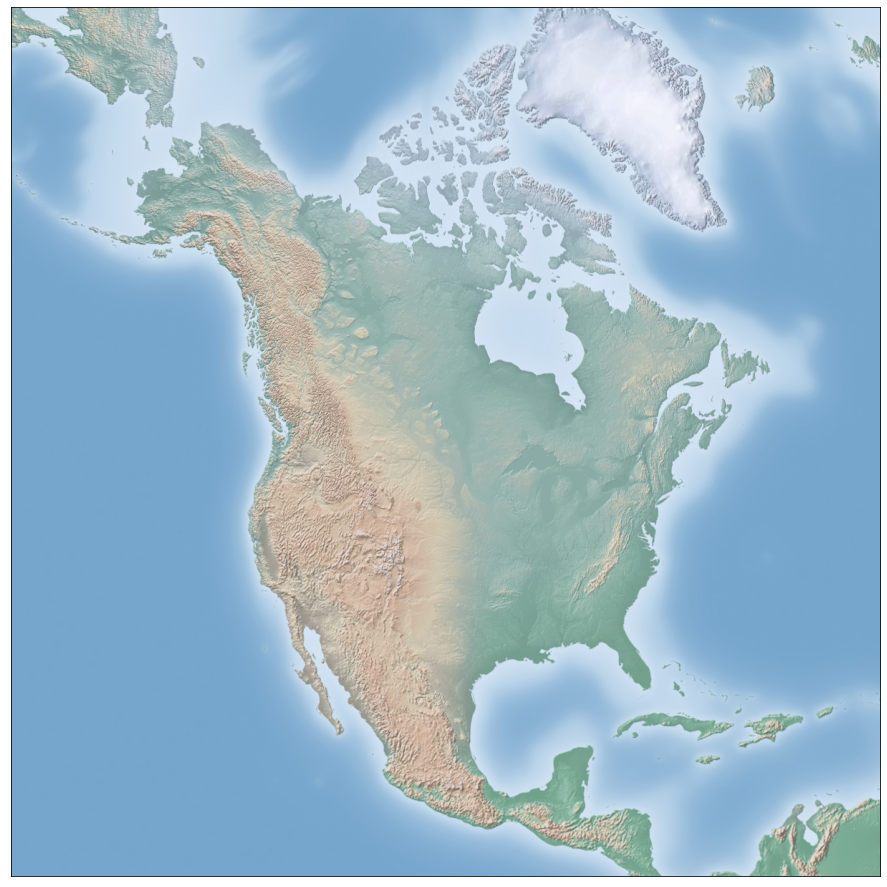

In [46]:
fig = plt.figure(figsize=(20, 16))
m = Basemap(projection='lcc', resolution='c', width=9E6, height=9E6, lat_0=50, lon_0=260,)

m.shadedrelief(scale=0.5)
m.pcolormesh(
    lon, lat,
    TS_diff_df.to_numpy(),
    latlon=True,
    cmap='RdBu_r'
)
plt.clim(-8, 10)
m.drawcoastlines(color='lightgray')

plt.title('Sample Graph')
plt.colorbar(label='Temp Class');